<a href="https://colab.research.google.com/github/cbaracho200/-Smart-Team-Agents-/blob/main/Classifica%C3%A7%C3%A3o_de_Textos_do_Twitter_com_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de textos do Twitter com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [ ]:
#!pip install spacy --upgrade
!pip install -q spacy==2.3.9

In [ ]:
import spacy
spacy.__version__

'2.3.9'

In [ ]:
!python3 -m spacy download pt

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-2.3.0/pt_core_news_sm-2.3.0.tar.gz#egg=pt_core_news_sm==2.3.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Using cached pt_core_news_sm-2.3.0-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.10/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.10/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

# Etapa 2: Carregamento das bases de dados

- Link Kaggle: https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis#TweetsNeutralHash.csv

## Base de treinamento

- Negative label: 0
- Positive label: 1

In [ ]:
base_treinamento = pd.read_csv('/content/Train50.csv', delimiter=';')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_treinamento.shape

(50000, 5)

In [ ]:
base_treinamento.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)


In [ ]:
base_treinamento.tail()

,id,tweet_text,tweet_date,sentiment,query_used
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(
49999,1046762735340584962,@Renk_lol Passa ano Entra ano Eu nao desisto d...,Mon Oct 01 14:04:18 +0000 2018,0,:(


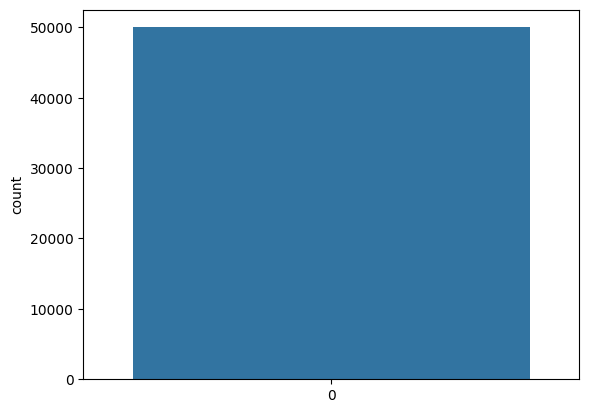

In [ ]:
sns.countplot(base_treinamento['sentiment'], label = 'Contagem');

In [ ]:
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [ ]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


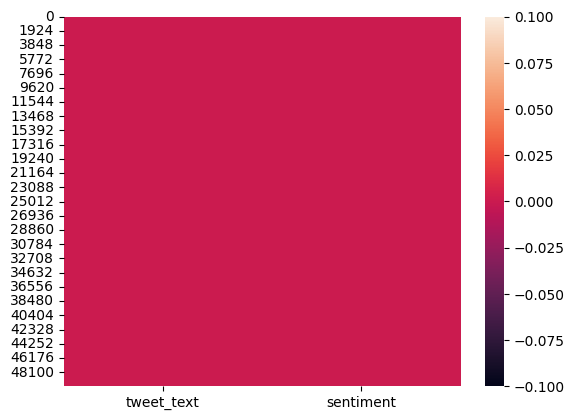

In [ ]:
sns.heatmap(pd.isnull(base_treinamento));

## Base de teste

In [ ]:
base_teste = pd.read_csv('/content/Test.csv', delimiter=';')

In [ ]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [ ]:
base_teste.shape

(5000, 5)

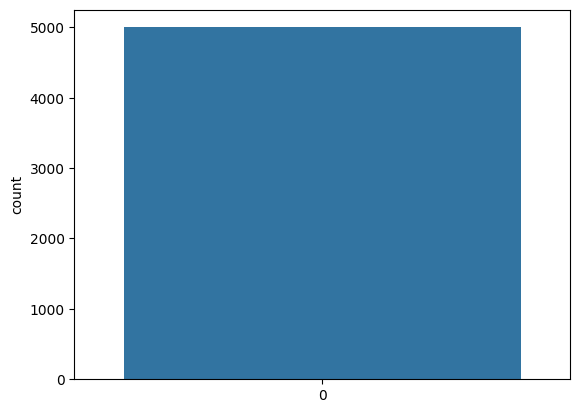

In [ ]:
sns.countplot(base_teste['sentiment'], label='Contagem');

In [ ]:
base_teste.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [ ]:
base_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


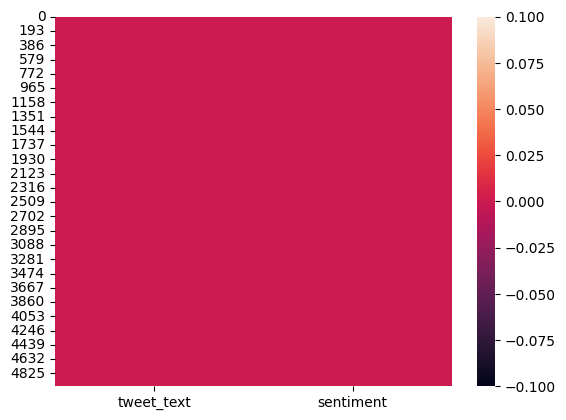

In [ ]:
sns.heatmap(pd.isnull(base_teste));

# Etapa 3: Função para pré-processamento dos textos

- Letras minúsculas
- Nome do usuário (@)
- URLs
- Espaços em branco
- Emoticons
- Stop words
- Lematização
- Pontuações

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
base_treinamento['tweet_text'][1]

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

In [ ]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [ ]:
print(stop_words)

{'tivestes', 'neste', 'tenho', 'vosso', 'vossa', 'disso', 'sabe', 'algo', 'a', 'esse', 'nossos', 'aí', 'tendes', 'poderá', 'aquele', 'nossas', 'ontem', 'estava', 'lugar', 'você', 'estes', 'tudo', 'é', 'meses', 'também', 'nunca', 'agora', 'tuas', 'aquelas', 'menor', 'faço', 'tempo', 'pelas', 'tais', 'vossos', 'porquanto', 'apenas', 'vossas', 'quais', 'nove', 'alguns', 'pelos', 'seu', 'depois', 'sob', 'forma', 'pela', 'nova', 'oitavo', 'tiveram', 'dessa', 'estivemos', 'tal', 'tarde', 'parte', 'ademais', 'corrente', 'me', 'fará', 'dá', 'final', 'mas', 'dar', 'naquele', 'uma', 'fostes', 'obrigada', 'podia', 'nem', 'atrás', 'seus', 'inicio', 'tanta', 'sua', 'ora', 'põe', 'somente', 'breve', 'de', 'dezasseis', 'fazemos', 'nível', 'usar', 'tente', 'tua', 'maiorias', 'dizem', 'comprida', 'podem', 'grande', 'vai', 'porque', 'seria', 'fazeis', 'coisa', 'primeira', 'dez', 'o', 'duas', 'todo', 'foste', 'cedo', 'são', 'tentar', 'através', 'isso', 'posso', 'deste', 'portanto', 'veja', 'mil', 'da', '

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(texto):
  # Letras minúsculas
  texto = texto.lower()

  # Nome do usuário
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

  # URLs
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

  # Espaços em branco
  texto = re.sub(r" +", ' ', texto)

  # Emoticons
  lista_emocoes = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes:
    texto = texto.replace(emocao, lista_emocoes[emocao])

  # Lematização
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)

  # Stop words e pontuações
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
texto_teste = '@behin_d_curtain :D Para :( mim, http://www.iaexpert.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
resultado = preprocessamento(texto_teste)
resultado

'  emocaopositiva parir emocaonegativa mim precisamente contrário emocaopositiva vir chuva vir disposição emocaopositiva'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [ ]:
base_treinamento.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [ ]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessamento)

In [ ]:
base_treinamento.head(10)

,tweet_text,sentiment
0,pessoa certo parir seriar valer azevedo emoc...,1
1,parir mim precisamente contrário emocaoposit...,1
2,video hoje ... pensar falar sobrar meter csgo ...,1
3,aaaaaaaa amar polaroids expressar quantum to a...,1
4,valorizar coração menino vc diferente sorrir ❤...,1
5,amigo to emocaopositiva,1
6,bravo jairo emocaopositiva,1
7,socorrer ksoaksosks achar to caixa som :p,1
8,gostar fazenda emocaopositiva morrer medo ga...,1
9,amanhar venom emocaopositiva,1


In [ ]:
base_teste['tweet_text'] = base_teste['tweet_text'].apply(preprocessamento)

In [ ]:
base_teste.head(10)

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir lin...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé morrer sono chegar casar ficar sono e...,1
5,preciso emocaopositiva,1
6,acaso adorar beijo abraço hahahahaha bue fof...,1
7,solteiro s emocaopositiva,1
8,lindeza cortador kit mário coleção bia cravol ...,1
9,claro emocaopositiva,1


### Tratamento da classe

In [ ]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [ ]:
base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})

  base_dados_treinamento_final.append([texto, dic.copy()])

In [ ]:
len(base_dados_treinamento_final)

50000

In [ ]:
base_dados_treinamento_final[10:15]

[['simplesmente deixar chatear querer muitooo iludir emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['comedir umar rotina perfeitamente parir consolidar escola condução :p',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['amigar parecer apaixonar vc — recíproco emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['  gajar bacano aleijar esperar silvar feliz emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['tou video cabra bebé emocaopositiva',
  {'POSITIVO': True, 'NEGATIVO': False}]]

In [ ]:
base_dados_treinamento_final[45000:45005]

[['menino pijama listrar filmar triste mundo estruturar nenhum pra assistir rever to pensar nisso emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['pra vídeo luísa raiz poliana infelizmente twitter tá ruim amanhã postar emocaonegativa asaventurasdepoliana099',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['to crise abstinência strangers emocaonegativa — tbm :/ to',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['  esquecer olhar pra pagar mensalidade turma pro cursar querer emocaonegativa',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['querer comer doce comer montar hoje emocaonegativa maldição',
  {'POSITIVO': False, 'NEGATIVO': True}]]

# Etapa 5: Criação do classificador

In [ ]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []

In [ ]:
modelo.begin_training()
for epoca in range(20):
  random.shuffle(base_dados_treinamento_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 9.474015952526393e-06}
{'textcat': 6.775837825163944e-07}
{'textcat': 4.593177064474846e-08}
{'textcat': 3.027462311194166e-08}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([9.47401595e-06, 9.47401595e-06, 9.47401595e-06, ...,
       1.53521424e-08, 1.53521424e-08, 1.53521424e-08])

Text(0, 0.5, 'Erro')

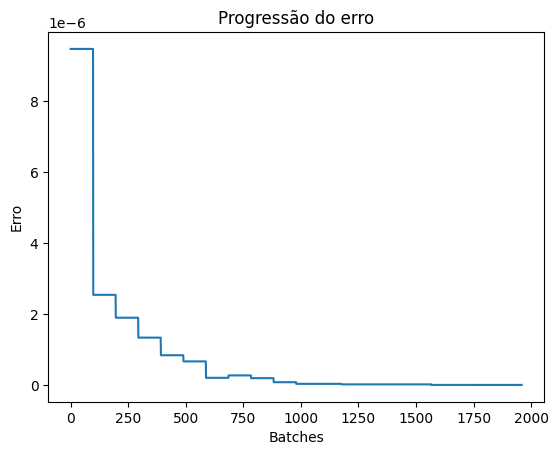

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [ ]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

## Texto positivo

In [ ]:
texto_positivo = base_teste['tweet_text'][21]
texto_positivo

'  ficar feliz q recíproco emocaopositiva'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

  ficar feliz q recíproco emocaopositiva

In [ ]:
previsao.cats

{'POSITIVO': 0.9997171759605408, 'NEGATIVO': 6.724462582496926e-05}

In [ ]:
texto_positivo = 'eu gosto muito de você'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'gostar'

In [ ]:
modelo_carregado(texto_positivo).cats

{'POSITIVO': 0.8956601619720459, 'NEGATIVO': 0.13231490552425385}

## Texto negativo

In [ ]:
base_teste['tweet_text'][4000]

'tô triste filmar mulan mushu emocaonegativa'

In [ ]:
texto_negativo = base_teste['tweet_text'][4000]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'POSITIVO': 0.00018287870625499636, 'NEGATIVO': 0.9998272061347961}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [ ]:
previsoes = []
for texto in base_treinamento['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

[{'POSITIVO': 0.9994687438011169, 'NEGATIVO': 0.00022081636416260153},
 {'POSITIVO': 0.9998897314071655, 'NEGATIVO': 0.00010422794002806768},
 {'POSITIVO': 0.9998672008514404, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0.999675989151001, 'NEGATIVO': 0.00027651412528939545},
 {'POSITIVO': 0.9998886585235596, 'NEGATIVO': 9.500825399300084e-05},
 {'POSITIVO': 0.9996523857116699, 'NEGATIVO': 0.00023671131930314004},
 {'POSITIVO': 0.9998537302017212, 'NEGATIVO': 0.00016415462596341968},
 {'POSITIVO': 0.9998801946640015, 'NEGATIVO': 5.4746295063523576e-05},
 {'POSITIVO': 0.9997939467430115, 'NEGATIVO': 9.609224798623472e-05},
 {'POSITIVO': 0.9999295473098755, 'NEGATIVO': 7.004448707448319e-05},
 {'POSITIVO': 0.9998732805252075, 'NEGATIVO': 8.18908229121007e-05},
 {'POSITIVO': 0.9996477365493774, 'NEGATIVO': 0.00016253899957519025},
 {'POSITIVO': 0.9997894167900085, 'NEGATIVO': 6.577187741640955e-05},
 {'POSITIVO': 0.9999347925186157, 'NEGATIVO': 4.539786823443137e-05},
 {'POSITIVO': 0

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
respostas_reais = base_treinamento['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.99998

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[24999,     1],
       [    0, 25000]])

<Axes: >

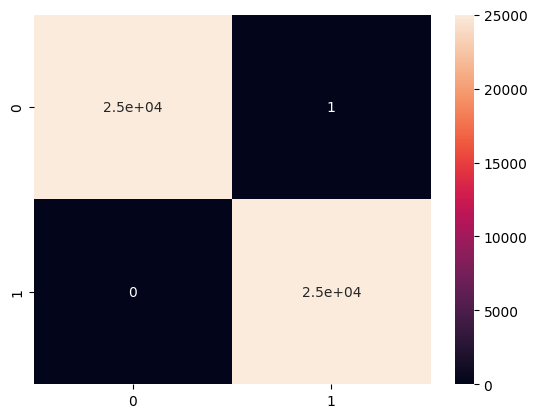

In [ ]:
sns.heatmap(cm, annot=True)

## Avaliação na base de teste

In [ ]:
previsoes = []
for texto in base_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_teste['sentiment'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.9974

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2492,    8],
       [   5, 2495]])

<Axes: >

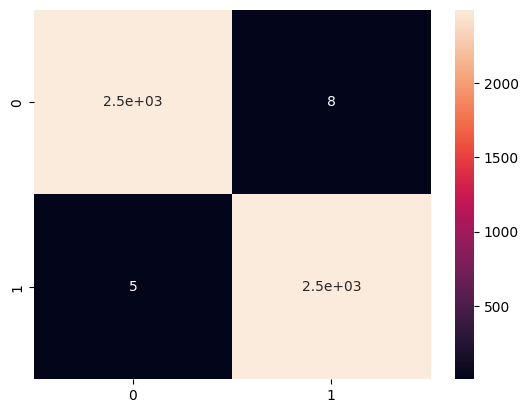

In [ ]:
sns.heatmap(cm, annot=True)